In [59]:
from minIA.visual_structures import *
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np


In [60]:
#Cargas
models_list = load_files("/data/SMH_final_models")
features_list = load_files("/data/visual_vocabulary")
path_images = '/data/images/images_gz2'
#path_images = '/data/images/images_gz2_clean'

In [61]:
@interact_manual 
def select_model(model_path=sorted(models_list)):
    global structures, structures_size
    structures_size, structures = load_model(models_list[model_path])
    print('Model loaded!')

interactive(children=(Dropdown(description='model_path', options=('DELF_v5-1_1000_r2_l1000.model', 'DELF_v5-1_…

In [62]:
@interact_manual 
def select_features(features_path=sorted(features_list)):
    global im_features_df
    im_features_df = load_im_features(features_list[features_path])
    print('Features loaded!')

interactive(children=(Dropdown(description='features_path', options=('visual_vocabulary_v2_SIFT_1000.csv', 'vi…

In [65]:
@interact_manual
def choose_structure(structure = range(0,len(structures))):
    global structure_id
    structure_id = structure
    image = np.zeros((10, 100))
    for word, frec in structures[structure_id]:
        image[word // 100][word % 100] = frec
    plt.rcParams["figure.figsize"] = (15,150)
    plt.imshow(image, cmap='hot', interpolation='nearest')
    plt.show()

interactive(children=(Dropdown(description='structure', options=(0, 1, 2), value=0), Button(description='Run I…

In [69]:
@interact_manual
def search(threshold = (0.001, 1.0, 0.01), split = (0.005, 1.0, 0.001)):
    global images_df 
    images_df = search_structure(im_features_df, structure_id, threshold, split)

interactive(children=(FloatSlider(value=0.491, description='threshold', max=1.0, min=0.001, step=0.01), FloatS…

In [ ]:
images_df.groupby(['image_name']).count()

In [ ]:
images_df.head()

In [71]:
img_names = images_df['image_name'].unique()
@interact_manual
def select_images(match_image=list(range(1,len(img_names)+1)), gray=False):
    show_images_per_structure(images_df, structure_id, img_names, match_image, path_images,gray)

interactive(children=(Dropdown(description='match_image', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …

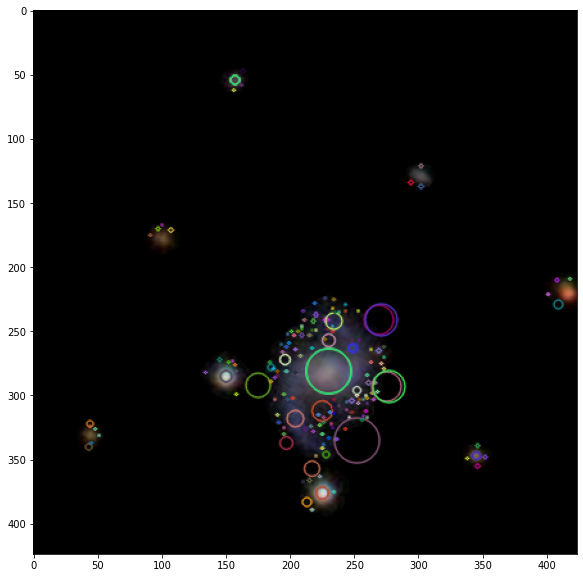

In [23]:
import cv2 as cv
def gen_key_points(points_img):
    keypoints = list()
    for point in points_img:
        keypoints.append(cv.KeyPoint(point[0], point[1], point[2]))
    return keypoints

def get_image_points(img_name, images_df):
    img_df = images_df.loc[img_name]
    points = zip(img_df['location_x'],
                 img_df['location_y'],
                 img_df['size'])
    return points

def draw_kp_image(img_name, images_df, path_images):
    fig = plt.figure(figsize=(10, 10))
    img = cv.imread(path.join(path_images, str(img_name)+'.jpg'))
    points = get_image_points(img_name, images_df)
    kp = gen_key_points(points)
    img = cv.drawKeypoints(img, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv.imwrite('/data/images/plots/'+str(img_name)+'.jpg', img)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    
draw_kp_image('F252299',im_features_df, path_images)